In [2]:
%matplotlib inline
import numpy as np
import pylab as plt
from glob import glob
import os
import math
import sys
sys.path.insert(0,r"C:\Program Files\xraylib 64-bit\Python")
import xraylib


In [3]:
def absorb(E, material, s, r): 
    """
    This function calculate the intensity of the radiation given absorption.
    
    :param E: voltage x-ray tube
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    """
    A = np.exp(-xraylib.CS_Total_CP(material, E)*r*s)
    return A


In [4]:
def func(E, Ek):
    

    z=42.0 # порядковый номер элемента анода(молибден)
    res = z*Ek*Ek/12.39/12.39*E*E*(Ek/12.39-1/12.39*E)
    return res

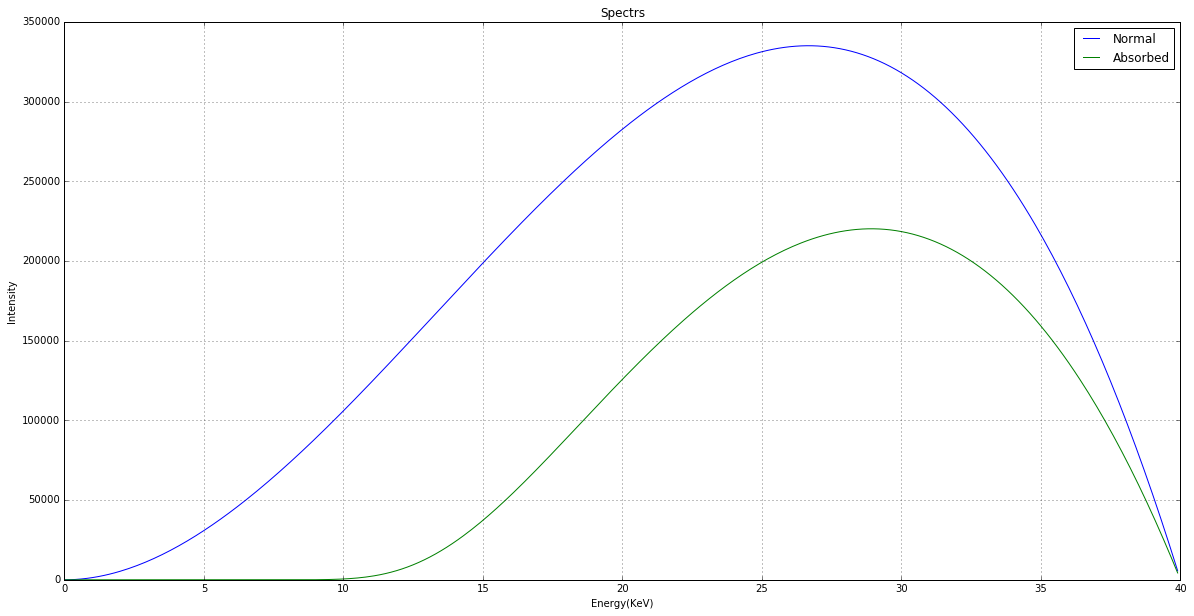

In [5]:
Ekr = 40 #np.arange(10, 100, 10)

plt.figure(figsize=(20,10))
E = np.arange(0, Ekr, 0.1)
Etemp = []
Ea = []
j =0

while j < (Ekr/0.1):
    Etemp.append(func(E[j], Ekr)) 
    Ea.append(func(E[j], Ekr)*absorb(E[j], 'H2O', 1, 1)) 
    j = j + 1
plt.hold(True)
plt.plot(E, Etemp, label='Normal')
plt.plot(E, Ea, label='Absorbed')
plt.grid(True)
plt.legend(loc=0)
plt.title('Spectrs')
plt.xlabel('Energy(KeV)')
plt.ylabel('Intensity')

C:\Users\AG\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in true_divide
C:\Users\AG\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


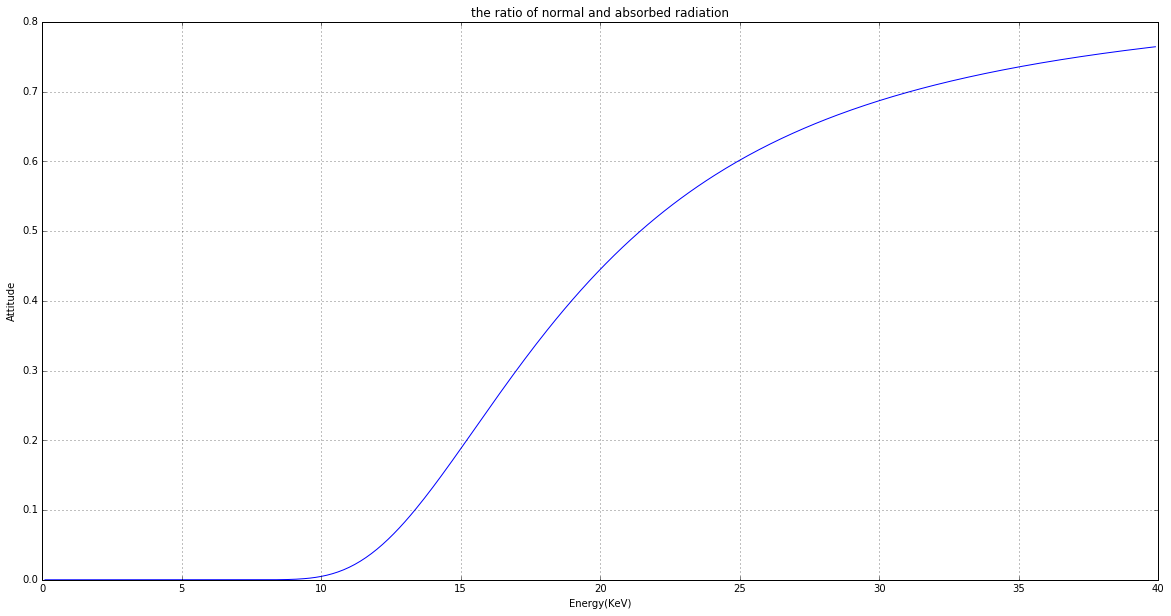

In [18]:
plt.figure(figsize=(20,10))

Eo = []


Eo = np.asarray(Ea)/np.asarray(Etemp) 


plt.hold(True)
plt.plot(E, Eo)
plt.grid(True)
plt.legend(loc=0)
plt.title('the ratio of normal and absorbed radiation')
plt.xlabel('Energy(KeV)')
plt.ylabel('Attitude')

In [62]:
Ekr = 30

E = 2/3*Ekr
t0 = 1/5*0.009
t = 0
m = 360 
n = 240
Mas = [[func(E,Ekr)] * m for j in range(n)]

for j in range(0, n, 1):
    for i in range(0, m, 1):
        if i>=130 and i<=180:
            t = 0.02*np.sqrt(2500 - (50 - i + 130)**2)
            Mas[j][i] = func(E,Ekr)*absorb(E, 'H2O', t, 1)
        elif i>180 and i<=230:
            t = 0.02*np.sqrt(2500 - (i - 180)**2)
            Mas[j][i] = func(E,Ekr)*absorb(E, 'H2O', t, 1)
            

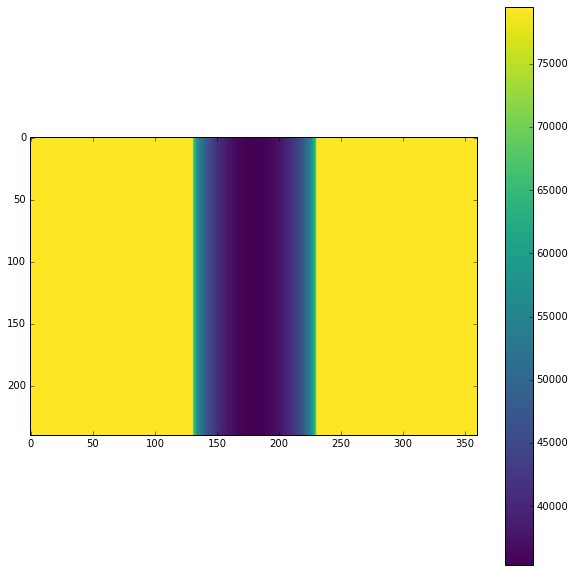

In [63]:

plt.figure(figsize=(10,10))
plt.imshow(Mas, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

In [9]:

print(E[170], Etemp[170], Ea[170])

17.0 234844.84561 70548.8973012
